<a href="https://colab.research.google.com/github/HussainBadreddeen/AutoML_Thesis/blob/main/hard_dataset_preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Importing libraries needed and importing the dataset from google drive

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set()
# from google.colab import drive
# drive.mount('/content/drive')


file_path = "/content/drive/MyDrive/thesisdata/balanced-reviews.txt"

# Load as a DataFrame (change delimiter if needed)
df = pd.read_csv(file_path, sep="\t", encoding="utf-16")




## I follow the CRISP-DM process here.
I've already done business understanding since I've mentioned the goal and objectives of this project is to compare AutoML for arabic sentiment analysis with manual tuning of hyperparameters

## **Data Understanding**

In [ ]:
#first few rows
print(df.head())
print("----------------------------")
print()
#Number of Rows and coloumns
print('Number of rows and columns in the data set:', df.shape)
print("----------------------------")
print()
#Data types of the dataset
df.info()
print("----------------------------")
print()

# Display summary statistics for numerical features
print(df.describe())
print("----------------------------")
print()
#quick check if there are any missing values
print("Missing Values:")
print(df.isnull().sum())
print("----------------------------")
print()

   no Hotel name  rating    user type                   room type  \
0   2    فندق 72       2  مسافر منفرد  غرفة ديلوكس مزدوجة أو توأم   
1   3    فندق 72       5          زوج  غرفة ديلوكس مزدوجة أو توأم   
2  16    فندق 72       5          زوج                           -   
3  20    فندق 72       1          زوج          غرفة قياسية مزدوجة   
4  23    فندق 72       4          زوج  غرفة ديلوكس مزدوجة أو توأم   

            nights                                             review  
0  أقمت ليلة واحدة                  “ممتاز”. النظافة والطاقم متعاون.   
1  أقمت ليلة واحدة  استثنائي. سهولة إنهاء المعاملة في الاستقبال. ل...  
2      أقمت ليلتين  استثنائي. انصح بأختيار الاسويت و بالاخص غرفه ر...  
3  أقمت ليلة واحدة  “استغرب تقييم الفندق كخمس نجوم”. لا شي. يستحق ...  
4      أقمت ليلتين  جيد. المكان جميل وهاديء. كل شي جيد ونظيف بس كا...  
----------------------------

Number of rows and columns in the data set: (105698, 7)
----------------------------

<class 'pandas.core.frame.DataFrame'>

##since we know that we are trying to measure sentiment we focus on data related to reviews and their ratings

Amount of Values in the column: 105698
----------------------------
Number of unique ratings: 4
The unique values are:  [2 5 1 4]
----------------------------
Count of 'rating one': 14382                    Percentage of Total= 13.606690760468505 %
----------------------------
Count of 'rating two': 38467                    Percentage of Total= 36.3933092395315 %
----------------------------
Count of 'rating four': 26450                    Percentage of Total= 25.024125338227783 %
----------------------------
Count of 'rating five': 26399                    Percentage of Total= 24.975874661772217 %
----------------------------


<Axes: xlabel='rating', ylabel='count'>

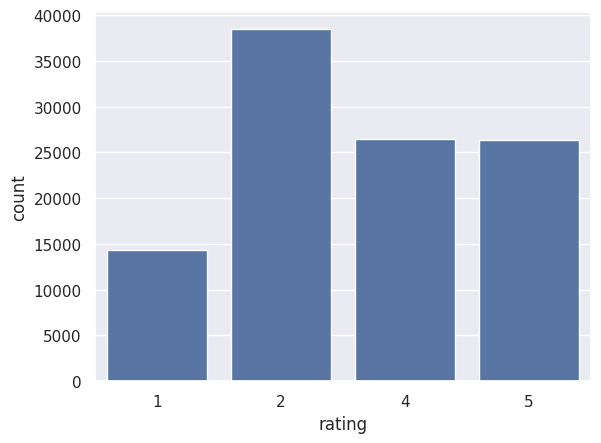

In [ ]:
#Checking How many values are Unqiue from the total values for the Column rating
print("Amount of Values in the column:", df["rating"].count())
print("----------------------------")
unique_ratings = df['rating'].nunique()
print(f"Number of unique ratings: {unique_ratings}")
print("The unique values are: " ,df['rating'].unique())
#1,2,4,5 are the unique values as they represent either negative (1,2) or positive (4,5). 3 was removed in the balanced version of the dataset
print("----------------------------")

count_of_rating_1 = (df['rating'] == 1).sum()
print("Count of 'rating one':", count_of_rating_1, "                   Percentage of Total=", count_of_rating_1/df["rating"].count()*100,"%")
print("----------------------------")

count_of_rating_2 = (df['rating'] == 2).sum()
print("Count of 'rating two':", count_of_rating_2, "                   Percentage of Total=", count_of_rating_2/df["rating"].count()*100,"%")
print("----------------------------")

count_of_rating_4 = (df['rating'] == 4).sum()
print("Count of 'rating four':", count_of_rating_4, "                   Percentage of Total=", count_of_rating_4/df["rating"].count()*100,"%")
print("----------------------------")

count_of_rating_5 = (df['rating'] == 5).sum()
print("Count of 'rating five':", count_of_rating_5, "                   Percentage of Total=", count_of_rating_5/df["rating"].count()*100,"%")
print("----------------------------")

#We can plot the number of ratings for each in a small graph here
sns.countplot(x = 'rating', data = df)
#(1-2)= negative
#(4-5)= positive

## We group ratings (1-2) and (4,5) to show total count of negative and positive sentiment respectively

Count of 'negative sentiment': 52849                    Percentage of Total= 50.0 %
Count of 'positive sentiment': 52849                    Percentage of Total= 50.0 %


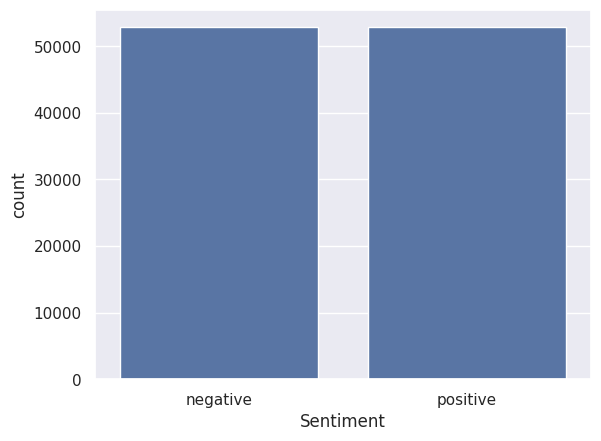

In [ ]:
#we create a new data frame called sentiment to have only positive and negative classes so we can compare safely without skewing the original data set
df['Sentiment'] = df['rating'].apply(lambda rating : 'negative' if rating < 4 else 'positive')

#we then plot the total count of each sentiment
sns.countplot(x = 'Sentiment', data = df)

negative_sentiment = (df['Sentiment'] == 'negative').sum()
print("Count of 'negative sentiment':", negative_sentiment, "                   Percentage of Total=", negative_sentiment/df["Sentiment"].count()*100,"%")

positive_sentiment = (df['Sentiment'] == 'positive').sum()
print("Count of 'positive sentiment':", positive_sentiment, "                   Percentage of Total=", positive_sentiment/df["Sentiment"].count()*100,"%")

#Data set appears to be prefectly balanced

##since we've covered the ratings we move on to the reviews

count                     105698
unique                    104036
top       استثنائي. كل شي. لا شي
freq                          62
Name: review, dtype: object

Sample Reviews:
 86364    “ضعيف جدا جدا”. الموقع فقط. خدمة الواي فاي خدم...
76397    استثنائي. موقع الفندق والراحه وتعامل الطاقم وا...
51495                       ضعيف. . الاثاث سيء جدا جدا جدا
52801    “السعر غير مناسب مع مستوى الخدمات بالفندق”. . ...
59836    مخيب للأمل. . غير نظيفخدمه الغرف سيئهالتكييف ا...
Name: review, dtype: object


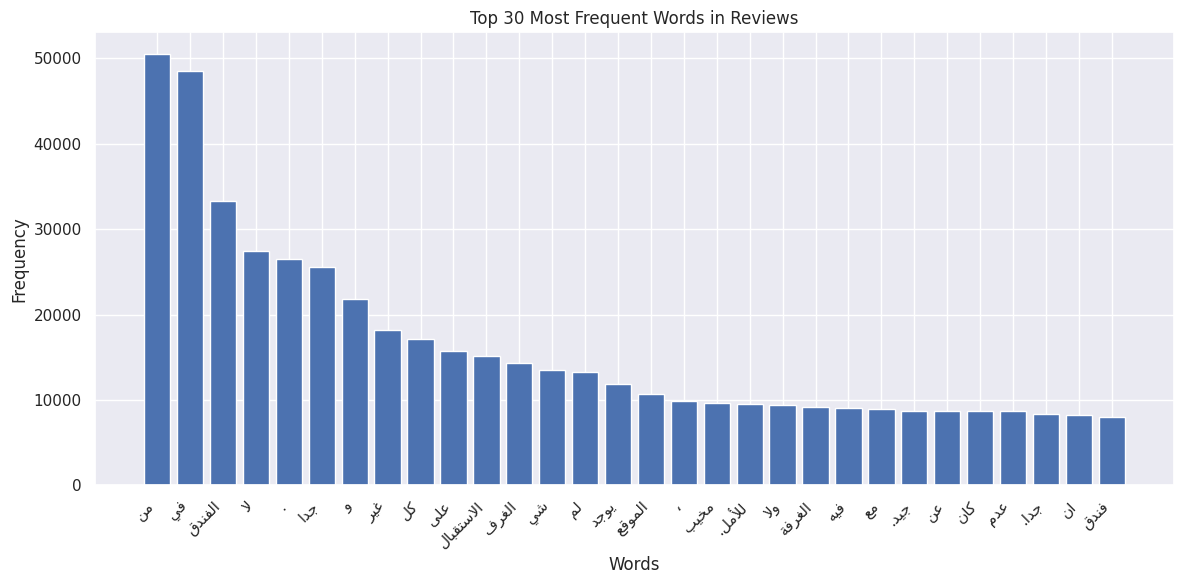

In [ ]:
!pip install arabic-reshaper
!pip install python-bidi
!pip install camel-tools

#THIS CELL'S CODE WAS GENERATED USING A.I

from collections import Counter
from arabic_reshaper import reshape
from bidi.algorithm import get_display

# Inspect the review column
print(df['review'].describe())  # Basic statistics (count, unique, top, freq)
print("\nSample Reviews:\n", df['review'].sample(5))  # Print random 5 reviews

# Combine all reviews into a single string
all_reviews = ' '.join(df['review'].astype(str))

# Tokenization (splitting into words)
words = all_reviews.split()

# Count word frequencies
word_counts = Counter(words)

# Get the top 30 most frequent words
top_30_words = word_counts.most_common(30)

# Prepare Arabic words for visualization
words, counts = zip(*top_30_words)
reshaped_words = [reshape(word) for word in words]
display_words = [get_display(word) for word in reshaped_words]

# Plot word frequencies
plt.figure(figsize=(12, 6))
plt.bar(display_words, counts)
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.title("Top 30 Most Frequent Words in Reviews")
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


# from itertools import islice
# from collections import Counter

# # Function to generate n-grams
# def get_ngrams(words, n):
#     return [' '.join(words[i:i+n]) for i in range(len(words)-n+1)]

# # Generate bigrams and trigrams
# bigrams = get_ngrams(words, 2)
# trigrams = get_ngrams(words, 3)

# # Count frequencies
# bigram_counts = Counter(bigrams).most_common(30)
# trigram_counts = Counter(trigrams).most_common(30)

# # Prepare for visualization (Arabic reshaping)
# bigram_words, bigram_freqs = zip(*bigram_counts)
# trigram_words, trigram_freqs = zip(*trigram_counts)

# bigram_display = [get_display(reshape(w)) for w in bigram_words]
# trigram_display = [get_display(reshape(w)) for w in trigram_words]

# # Plot bigrams
# plt.figure(figsize=(12, 6))
# plt.barh(bigram_display, bigram_freqs)
# plt.xlabel("Frequency")
# plt.ylabel("Bigrams")
# plt.title("Top 30 Most Frequent Bigrams in Reviews")
# plt.gca().invert_yaxis()  # Invert for better readability
# plt.show()

# # Plot trigrams
# plt.figure(figsize=(12, 6))
# plt.barh(trigram_display, trigram_freqs)
# plt.xlabel("Frequency")
# plt.ylabel("Trigrams")
# plt.title("Top 30 Most Frequent Trigrams in Reviews")
# plt.gca().invert_yaxis()
# plt.show()


# import seaborn as sns

# # Compute review lengths
# df['review_length'] = df['review'].astype(str).apply(len)

# # Plot distribution
# plt.figure(figsize=(10, 5))
# sns.histplot(df['review_length'], bins=30, kde=True)
# plt.xlabel("Review Length (Characters)")
# plt.ylabel("Frequency")
# plt.title("Distribution of Review Lengths")
# plt.show()



# # Compute review length in words and characters
# df['word_count'] = df['review'].astype(str).apply(lambda x: len(x.split()))
# df['char_count'] = df['review'].astype(str).apply(len)

# # Plot word count distribution
# plt.figure(figsize=(10, 5))
# sns.histplot(df['word_count'], bins=30, kde=True)
# plt.xlabel("Number of Words in Review")
# plt.ylabel("Frequency")
# plt.title("Distribution of Word Count in Reviews")
# plt.show()



# import nltk
# nltk.download('stopwords')
# from nltk.corpus import stopwords



# # Load Arabic stopwords
# stopwords_list = set(stopwords.words('arabic'))

# # Count how many words are stopwords
# stopword_counts = Counter([word for word in words if word in stopwords_list])
# top_20_stopwords = stopword_counts.most_common(30)

# # Prepare stopwords for visualization
# stopword_words, stopword_freqs = zip(*top_20_stopwords)
# stopword_display = [get_display(reshape(w)) for w in stopword_words]

# # Plot stopword frequencies
# plt.figure(figsize=(12, 6))
# plt.bar(stopword_display, stopword_freqs)
# plt.xlabel("Stopwords")
# plt.ylabel("Frequency")
# plt.title("Top 20 Most Frequent Stopwords in Reviews")
# plt.xticks(rotation=45, ha='right')
# plt.tight_layout()
# plt.show()

since we've inspected our main 2 attributes rating and review. we move on to data preperation where we drop other columns and start preprocessing the reviews

##**Data preperation**

In [ ]:
df_copy = df[['rating', 'review']].copy()

df_copy.head()

,rating,review
0,2,“ممتاز”. النظافة والطاقم متعاون.
1,5,استثنائي. سهولة إنهاء المعاملة في الاستقبال. ل...
2,5,استثنائي. انصح بأختيار الاسويت و بالاخص غرفه ر...
3,1,“استغرب تقييم الفندق كخمس نجوم”. لا شي. يستحق ...
4,4,جيد. المكان جميل وهاديء. كل شي جيد ونظيف بس كا...


##We start with Normalizing the arabic text

In [ ]:
#To normalize arabic text we need to removing diacritics (tashkeel), removing elongation of words (tatweel) converting variations of the same certain letter to a standard unified form
#couldnt use farasa so opted for camel tools

# !pip install farasa # cant normalise with it :(
# !pip install camel-tools
import re
from camel_tools.utils.normalize import normalize_alef_maksura_ar
from camel_tools.utils.normalize import normalize_alef_ar
from camel_tools.utils.normalize import normalize_teh_marbuta_ar
from camel_tools.utils.normalize import normalize_unicode
from camel_tools.utils.dediac import dediac_ar


punctuation_pattern = re.compile(r"[-،؟.!\"':;(){}“”‘’]")  # Remove Arabic & English punctuation
quotes_pattern = re.compile(r'[\"\'“”‘’]')  # Matches only quotation marks (Arabic & English)


def remove_elongation(text):
    # Rule 1: Remove if a letter is repeated 3+ times anywhere
    text = re.sub(r'(.)\1{2,}', r'\1', text)

    # Rule 2: Remove if a letter is repeated 2+ times at the end of the word
    text = re.sub(r'(\w)\1$', r'\1', text)

    return text


def preprocess_text(text):
    text = normalize_unicode(text)  # Step 1: Normalize Unicode
    text = remove_elongation(text)  # Step 2: Remove elongation ## removes momtaz and other normal arabic words a workaround could be 3+ letters but will try to find a library first
    text = re.sub(r'[٠-٩]', lambda x: str(ord(x.group()) - ord('٠')), text)  # Step 3: Convert Arabic numbers to English
    # text = re.sub(r'\d+', '', text)  # Step 4: Remove all numbers ##for now i wont reemove cause
    text = quotes_pattern.sub('', text)  # Step 5: Remove quotation marks (but keep text inside)
    text = dediac_ar(text)  # Step 6: Remove diacritics
    text = normalize_alef_maksura_ar(text)  # Step 7: Normalize ى → ي
    text = normalize_teh_marbuta_ar(text)  # Step 8: Normalize ة → ه
    text = normalize_alef_ar(text) # step 9  Normalize alef variants to 'ا'
    text = punctuation_pattern.sub('', text)  # Step 10: Remove punctuation
    # text = re.sub(r'(?<!\w)و(?=\w)', r'و ', text)  # Add space after و only if it's at the start
    # text = re.sub(r'(?<=\w)و(?!\w)', r' و', text)  # Add space before و only if it's at the end # Ensure "و" is separated only when it's at the beginning of a word


    text = re.sub(r'\s+', ' ', text).strip()

    return text.strip()  # Step 11: Trim spaces


print()
print("Before camel tools and manual normalization")
print(df_copy['review'].head(20))
print("----------------------------")
print()

# Apply to entire DataFrame
df['normalized_review'] = df['review'].astype(str).apply(preprocess_text)

print("After camel tools and manual normalization")
print(df['normalized_review'].head(20))
print("----------------------------")
print()


Before camel tools and manual normalization
0                                                                                                                                                                                    “ممتاز”. النظافة والطاقم متعاون. 
1                                                                                                                                                                   استثنائي. سهولة إنهاء المعاملة في الاستقبال. لاشيئ
2                                                                                                                                                  استثنائي. انصح بأختيار الاسويت و بالاخص غرفه رقم 801. نوعية الارضيه
3                                                                                                                                                                “استغرب تقييم الفندق كخمس نجوم”. لا شي. يستحق 2 نجمه 
4                                                                                              

## After normalizing text we do Tokenization

In [ ]:
from camel_tools.tokenizers.word import simple_word_tokenize

# Tokenize the normalized reviews
# df['tokens'] = df['normalized_review'].apply(lambda x: simple_word_tokenize(x))

# Display the first few rows to verify tokenization
print(df[['normalized_review', 'tokens']].head(20))


                                                                                                                                                                                                 normalized_review                                                                                                                                                                                                                                         tokens
0                                                                                                                                                                                     ممتاز النظافه والطاقم متعاون                                                                                                                                                                                                              [ممتاز, النظافه, والطاقم, متعاون]
1                                                                                                   

## **We then remove stop words**

In [ ]:
# prompt: load the updated_stopwords.txt file from the google drive same folder ss the already imported dataset

# Mount Google Drive (if not already mounted)
# from google.colab import drive
# drive.mount('/content/drive')

# Specify the path to your stopwords file
stopwords_file_path = "/content/drive/MyDrive/thesisdata/updated_stopwords.txt"

# Load stopwords as a set
df_stopwords = set(pd.read_csv(stopwords_file_path, header=None, encoding="utf-8")[0].tolist())

# Apply stopword removal
df["filtered_tokens"] = df["tokens"].apply(lambda tokens: [word for word in tokens if word not in df_stopwords])



from collections import Counter

# Get all removed stopwords
removed_words = []
for original, filtered in zip(df["tokens"], df["filtered_tokens"]):
    removed_words.extend([word for word in original if word not in filtered])

# Count removed words
removed_counts = Counter(removed_words)

# Print top 10 most removed words
print("Most removed stopwords:", removed_counts.most_common(200))


# Display results
print("Tokens before filtering stop words")
print(df["tokens"].head(10))
print("---------------------\n")

print("Tokens after filtering stop words")
print(df["filtered_tokens"].head(10))
print("----------------------\n")


FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/thesisdata/updated_stopwords.txt'